In [2]:
import pandas as pd

# Load data
data = pd.read_csv('regression_test.csv')

# Display the first few rows of the dataset
print(data.head())


   gender age.group education.level       income what.is.your.handedness  \
0  Female   25 - 30       MD or PhD    50k - 80k        I am left handed   
1    Male   20 - 25   Undergraduate    50k - 80k       I am right handed   
2  Female   30 - 35       MD or PhD  150k - 200k       I am right handed   
3    Male   15 - 20   Undergraduate      0 - 10k       I am right handed   
4  Female   35 - 40   Undergraduate      0 - 10k       I am right handed   

  what.is.your.height.express.it.as.a.number.in.metres.m  \
0                                          165 - 170       
1                                          175 - 180       
2                                          155 - 160       
3                                          185 - 190       
4                                          165 - 170       

  what.is.your.weight.express.it.as.a.number.in.kilograms.kg  \
0                                            40 - 50           
1                                            70 - 80  

In [11]:
from sklearn.preprocessing import LabelEncoder

# Drop duplicates
data = data.drop_duplicates()

# Check for missing values and fill or drop as needed
data = data.dropna()  # Or consider data.fillna(method="ffill") based on needs

# Encode categorical columns using LabelEncoder
# Loop through each column in data and apply LabelEncoder if column is of type 'object' (categorical)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the encoder if we need to inverse transform later

# Display cleaned data summary to confirm encoding
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 342
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   gender                                                         340 non-null    int32
 1   age.group                                                      340 non-null    int32
 2   education.level                                                340 non-null    int32
 3   income                                                         340 non-null    int32
 4   what.is.your.handedness                                        340 non-null    int32
 5   what.is.your.height.express.it.as.a.number.in.metres.m         340 non-null    int32
 6   what.is.your.weight.express.it.as.a.number.in.kilograms.kg     340 non-null    int32
 7   perfect.physical.health                                        340 non-null    int64


In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Ensure to replace 'life.is.good' with the correct column name if needed
X = data.drop('life.is.good', axis=1)
y = data['life.is.good']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets to confirm split
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Test target set shape:", y_test.shape)


Training feature set shape: (272, 38)
Test feature set shape: (68, 38)
Training target set shape: (272,)
Test target set shape: (68,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

# Initialize and train the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
print("Decision Tree model trained successfully.")


Linear Regression model trained successfully.
Decision Tree model trained successfully.


In [14]:
# Predictions for Linear Regression
predictions_lr = model_lr.predict(X_test)

# Predictions for Decision Tree Regression
predictions_dt = model_dt.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)
print(f"Linear Regression - MAE: {mae_lr}, R2: {r2_lr}")

# Evaluate Decision Tree Regression
mae_dt = mean_absolute_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)
print(f"Decision Tree Regression - MAE: {mae_dt}, R2: {r2_dt}")


Linear Regression - MAE: 0.4524370852436993, R2: 0.43640221285612724
Decision Tree Regression - MAE: 0.5147058823529411, R2: -0.06452844597174501


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


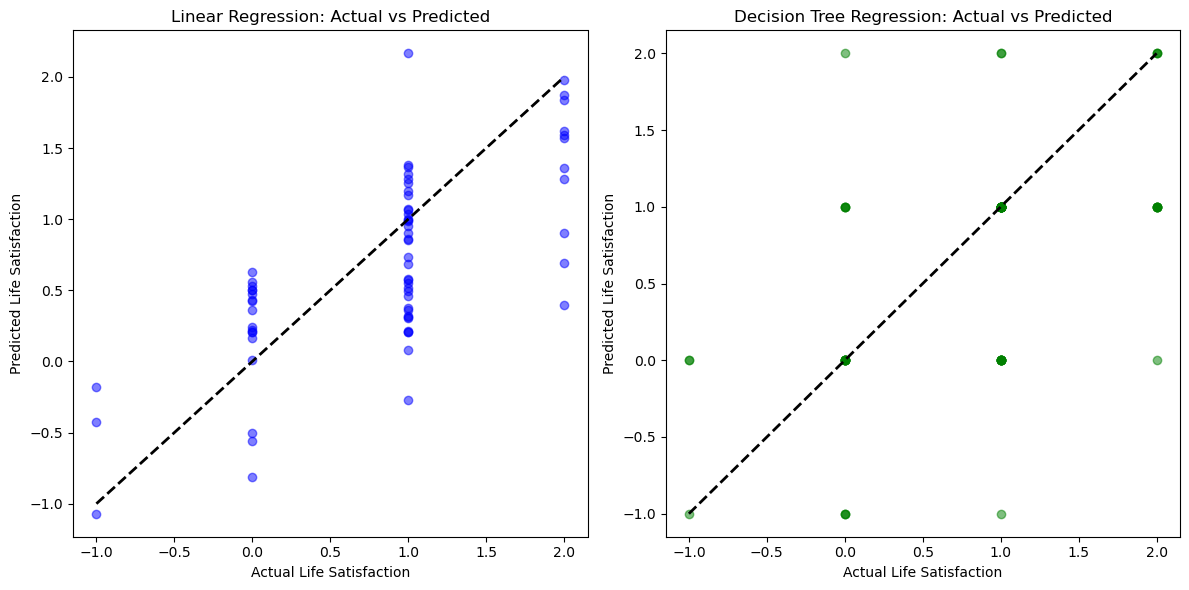

In [17]:
# Plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel("Actual Life Satisfaction")
plt.ylabel("Predicted Life Satisfaction")
plt.title("Linear Regression: Actual vs Predicted")

# Plot for Decision Tree Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_dt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel("Actual Life Satisfaction")
plt.ylabel("Predicted Life Satisfaction")
plt.title("Decision Tree Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()


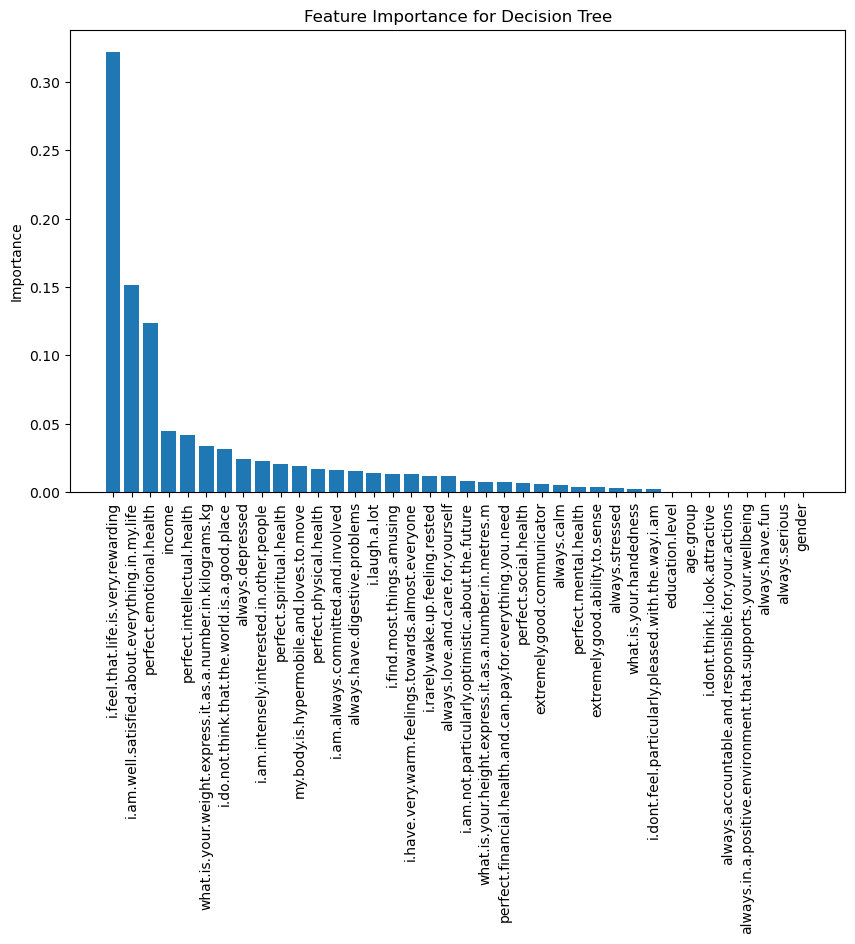

In [18]:
# Feature Importance Plot for Decision Tree
importances = model_dt.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Decision Tree")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.ylabel("Importance")
plt.show()


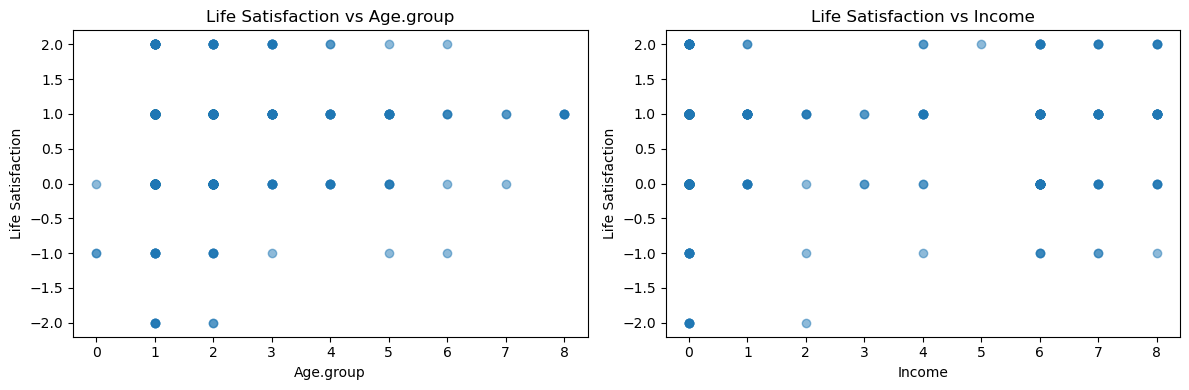

In [20]:
# Updated key features list
key_features = ['age.group', 'income']  # Make sure 'income' exists as well

plt.figure(figsize=(12, 4))
for i, feature in enumerate(key_features, 1):
    plt.subplot(1, len(key_features), i)
    plt.scatter(data[feature], data['life.is.good'], alpha=0.5)
    plt.xlabel(feature.capitalize())
    plt.ylabel("Life Satisfaction")
    plt.title(f"Life Satisfaction vs {feature.capitalize()}")

plt.tight_layout()
plt.show()
